<a href="https://colab.research.google.com/github/KeilaVCortes/COVID-19-CaseStudy-and-Predictions/blob/master/SEIR_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

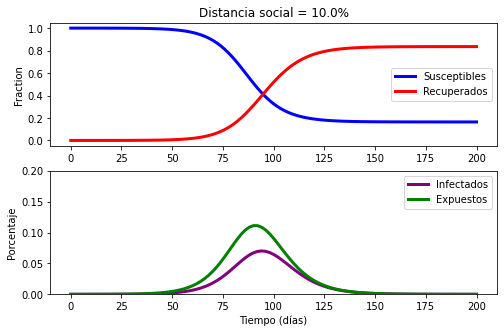

In [22]:
#Modelado de la propagación de una enfermedad
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint 

u = 0.1  # sana distancia (0-1)
         # 0   = sin sana distancia
         # 0.1 = cubrebocas
         # 0.2 = cubrebocas y en clases
         # 0.3 = cubrebocas, en clases y en línea

tasa_incubacion = 5.1
tasa_infeccion = 3.3
N_R0 = 2.4
N = 33517 #población

#número inicial de personas infectadas y recuperadas
E0 = 1/N
I0 = 0.00
R0 = 0.00
S0 = 1- E0 - I0 - R0
X0 = [S0,E0,I0,R0]

Alpha = 1/tasa_incubacion
Gamma = 1/tasa_infeccion
Beta  = N_R0*Gamma

def COVID19(X,t):
    S,E,I,R = X
    dx = np.zeros(4)
    dx[0] = -(1-u)*Beta * S * I
    dx[1] = (1-u)*Beta * S * I - Alpha * E
    dx[2] = Alpha * E - Gamma * I
    dx[3] = Gamma*I
    return dx

t = np.linspace(0,200,101)
X = odeint(COVID19,X0,t)
S = X[:,0]; E = X[:,1]; I = X[:,2]; R = X[:,3]

#Graficando los datos
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
plt.title('Distancia social = '+str(u*100)+'%')
plt.plot(t,S,color='blue',lw=3,label='Susceptibles')
plt.plot(t,R,color='red',lw=3,label='Recuperados')
plt.ylabel('Fraction')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,I,color='purple',lw=3,label='Infectados')
plt.plot(t,E,color='green',lw=3,label='Expuestos')
plt.ylim(0,0.2)
plt.xlabel('Tiempo (días)')
plt.ylabel('Porcentaje')
plt.legend()

plt.show()

